In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

In [2]:
pwd

'/Users/jordanromnes/Downloads/Project_1'

In [3]:
path = ('/Users/jordanromnes/Downloads/Project_1/keys.env')

In [4]:
# Load .env environment variables
load_dotenv(path)

True

In [5]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [6]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [7]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [39]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2021-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2024-01-01', tz='America/New_York').isoformat()

In [47]:
# Get 5 years' worth of historical data for Snowflake Inc SNOW
timeframe = "1Day"
ticker = ['AAPL', 'JPM', 'META', 'UNP', 'XOM', 'NEE', 'UNH', 'RIO', 'EQIX', 'WMT', 'AMZN']
portfolio_df = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=10000
).df

# Reorganize the DataFrame
# Separate ticker data
AAPL = portfolio_df[portfolio_df['symbol']=='AAPL'].drop(['symbol', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap'], axis=1)
JPM = portfolio_df[portfolio_df['symbol']=='JPM'].drop(['symbol', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap'], axis=1)
META = portfolio_df[portfolio_df['symbol']=='META'].drop(['symbol', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap'], axis=1)
UNP = portfolio_df[portfolio_df['symbol']=='UNP'].drop(['symbol', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap'], axis=1)
XOM = portfolio_df[portfolio_df['symbol']=='XOM'].drop(['symbol', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap'], axis=1)
NEE = portfolio_df[portfolio_df['symbol']=='NEE'].drop(['symbol', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap'], axis=1)
UNH = portfolio_df[portfolio_df['symbol']=='UNH'].drop(['symbol', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap'], axis=1)
RIO = portfolio_df[portfolio_df['symbol']=='RIO'].drop(['symbol', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap'], axis=1)
EQIX = portfolio_df[portfolio_df['symbol']=='EQIX'].drop(['symbol', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap'], axis=1)
WMT = portfolio_df[portfolio_df['symbol']=='WMT'].drop(['symbol', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap'], axis=1)
AMZN = portfolio_df[portfolio_df['symbol']=='AMZN'].drop(['symbol', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap'], axis=1)

# Concatenate the ticker DataFrames
portfolio_df = pd.concat([AAPL, JPM, META, UNP, XOM, NEE, UNH, RIO, EQIX, WMT, AMZN],axis=1, keys=['AAPL', 'JPM', 'META', 'UNP', 'XOM', 'NEE', 'UNH', 'RIO', 'EQIX', 'WMT', 'AMZN'])


# Display sample data
portfolio_df.head()

,AAPL,JPM,META,UNP,XOM,NEE,UNH,RIO,EQIX,WMT,AMZN
,close,close,close,close,close,close,close,close,close,close,close
timestamp,,,,,,,,,,,
2021-01-04 05:00:00+00:00,129.41,125.87,268.94,203.01,41.50,74.22,349.50,77.39,692.56,146.53,3186.63
2021-01-05 05:00:00+00:00,131.01,125.65,270.97,205.50,43.50,74.77,344.80,79.26,691.54,145.75,3218.51
2021-01-06 05:00:00+00:00,126.66,131.55,263.34,209.80,44.61,78.43,359.27,82.80,668.96,146.66,3138.38
2021-01-07 05:00:00+00:00,130.92,135.87,268.74,212.72,44.96,79.29,365.03,85.98,678.97,146.65,3162.16
2021-01-08 05:00:00+00:00,132.05,136.02,267.57,218.82,45.46,81.13,363.39,86.69,692.46,146.63,3182.70


In [48]:
# Calculate daily returns
returns = portfolio_df.pct_change()
# Drop NAs
returns = portfolio_df.pct_change().dropna()
# Display sample data
returns.head()

,AAPL,JPM,META,UNP,XOM,NEE,UNH,RIO,EQIX,WMT,AMZN
,close,close,close,close,close,close,close,close,close,close,close
timestamp,,,,,,,,,,,
2021-01-05 05:00:00+00:00,0.012364,-0.001748,0.007548,0.012265,0.048193,0.007410,-0.013448,0.024163,-0.001473,-0.005323,0.010004
2021-01-06 05:00:00+00:00,-0.033204,0.046956,-0.028158,0.020925,0.025517,0.048950,0.041966,0.044663,-0.032652,0.006244,-0.024897
2021-01-07 05:00:00+00:00,0.033633,0.032839,0.020506,0.013918,0.007846,0.010965,0.016033,0.038406,0.014964,-0.000068,0.007577
2021-01-08 05:00:00+00:00,0.008631,0.001104,-0.004354,0.028676,0.011121,0.023206,-0.004493,0.008258,0.019868,-0.000136,0.006496
2021-01-11 05:00:00+00:00,-0.023249,0.014924,-0.040102,-0.006718,0.030356,-0.017749,-0.007265,-0.033568,-0.014542,0.004501,-0.021519


In [54]:
# Set weights
weights = [0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]

# Calculate portfolio return
portfolio_returns = returns.dot(weights)
# Display sample data
portfolio_returns.head()

timestamp
2021-01-05 05:00:00+00:00    0.008996
2021-01-06 05:00:00+00:00    0.010468
2021-01-07 05:00:00+00:00    0.017696
2021-01-08 05:00:00+00:00    0.008854
2021-01-11 05:00:00+00:00   -0.010344
dtype: float64

<Axes: title={'center': 'Daily Returns of Evenly Weighted Portfolio'}, xlabel='timestamp'>

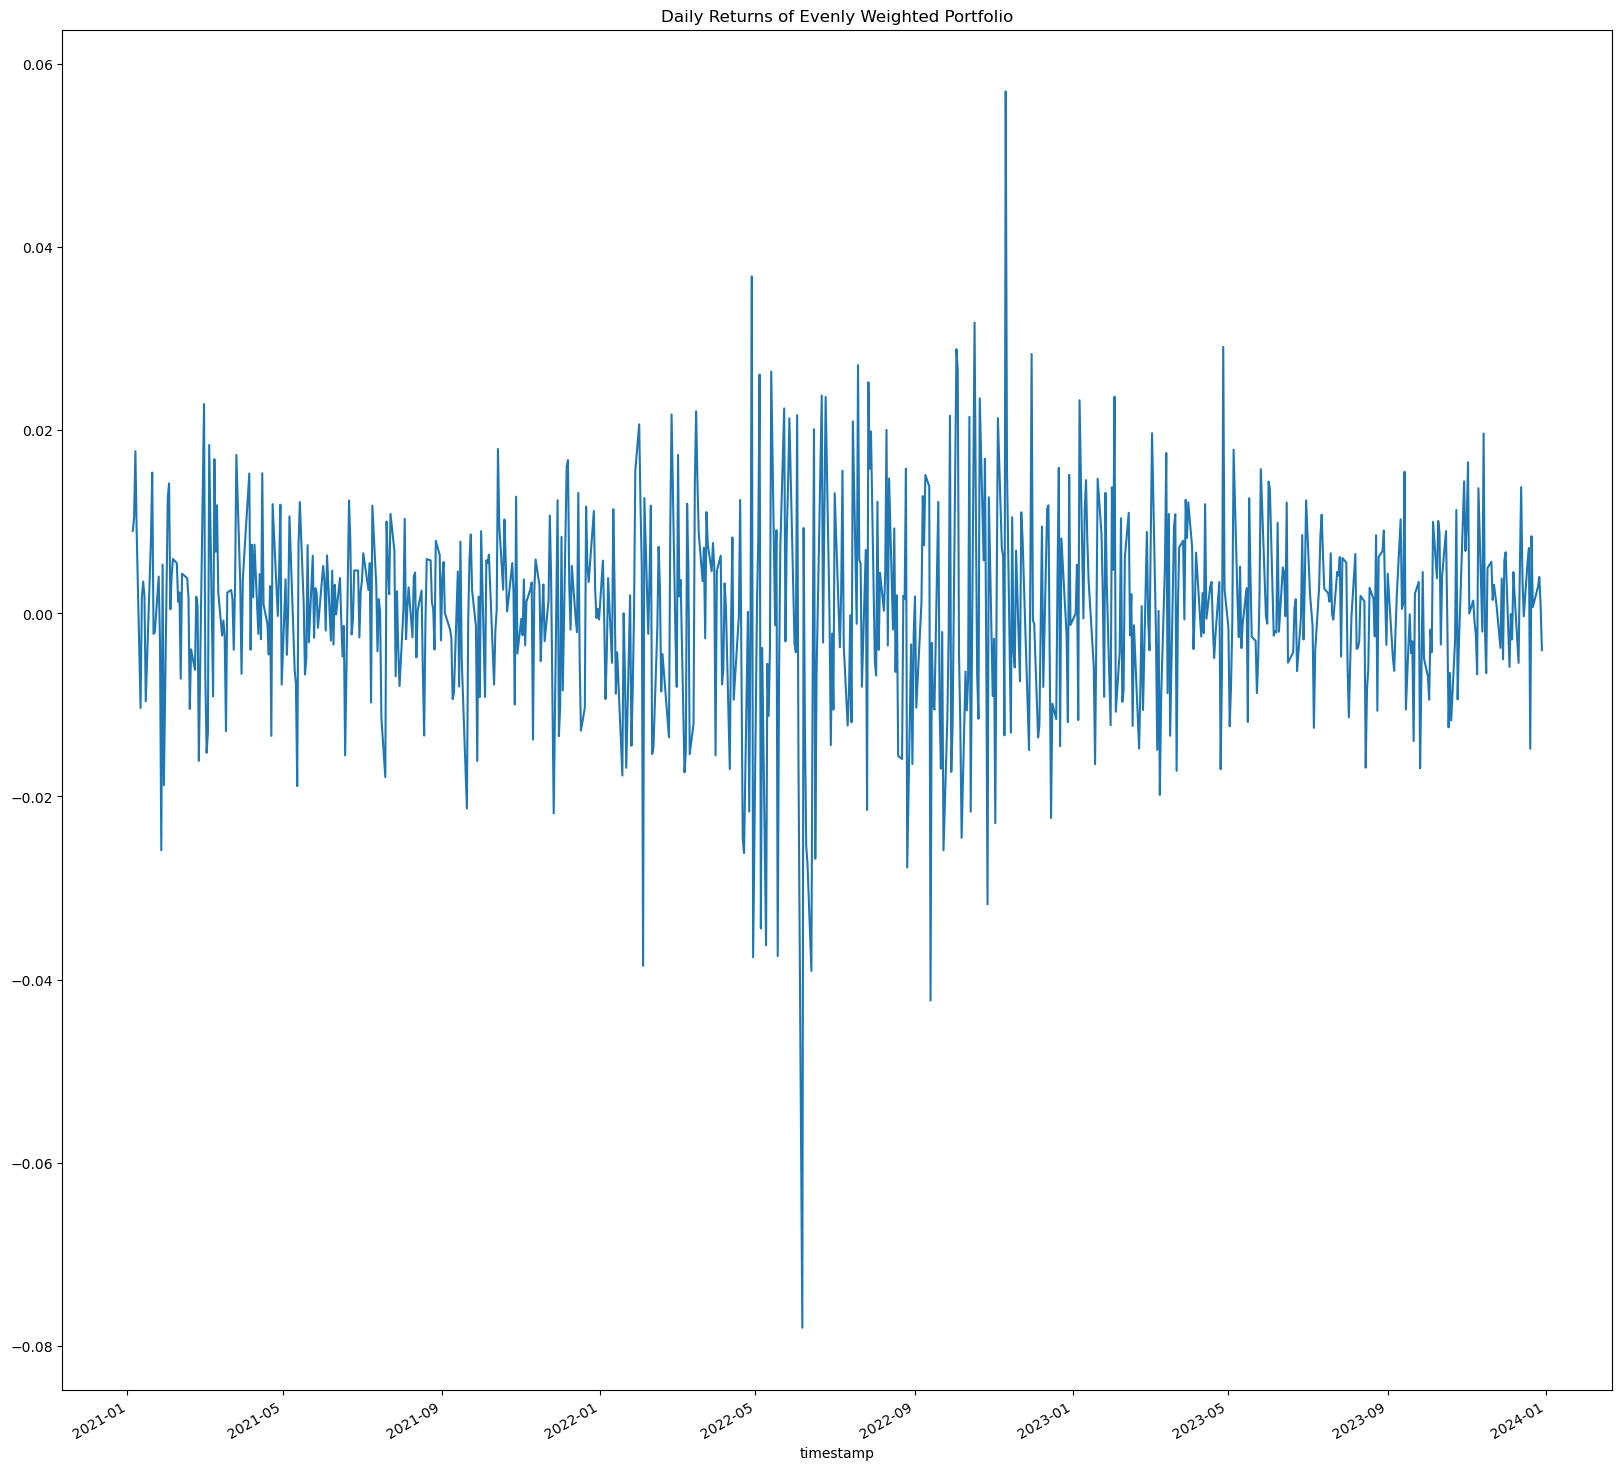

In [52]:
portfolio_returns.plot(figsize=(20,20), title="Daily Returns of Evenly Weighted Portfolio")

In [55]:
# Set weights
weights = [0.25, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075]

# Calculate portfolio return
tech_heavy_returns = returns.dot(weights)
# Display sample data
tech_heavy_returns.head()

timestamp
2021-01-05 05:00:00+00:00    0.009660
2021-01-06 05:00:00+00:00    0.002913
2021-01-07 05:00:00+00:00    0.020632
2021-01-08 05:00:00+00:00    0.008889
2021-01-11 05:00:00+00:00   -0.012688
dtype: float64

<Axes: title={'center': 'Daily Returns of Tech Heavy Portfolio'}, xlabel='timestamp'>

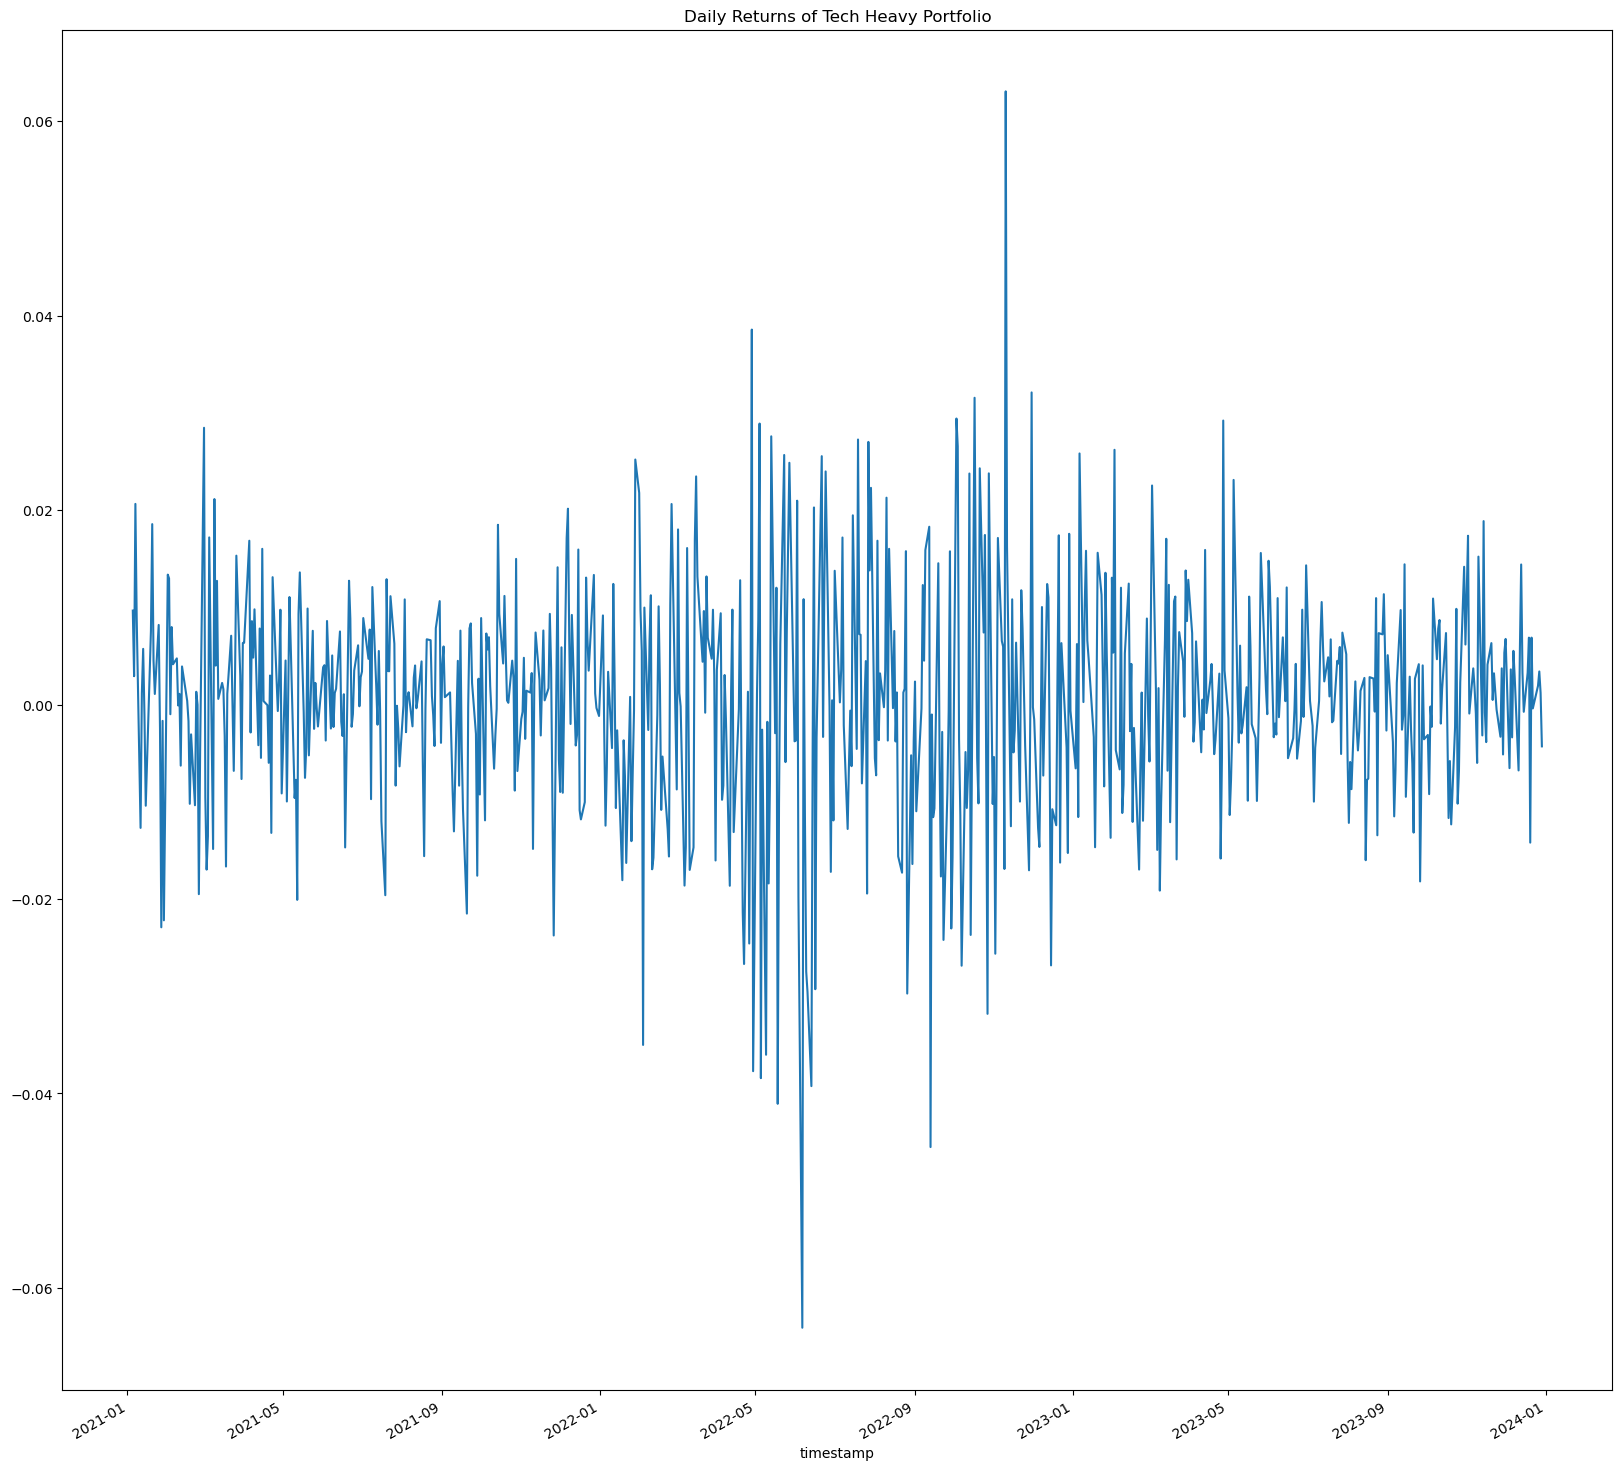

In [56]:
tech_heavy_returns.plot(figsize=(20,20), title="Daily Returns of Tech Heavy Portfolio")

In [57]:
all_returns = pd.concat([portfolio_returns, tech_heavy_returns], axis="columns", join="inner")

,0,1
timestamp,,
2021-01-05 05:00:00+00:00,0.008996,0.009660
2021-01-06 05:00:00+00:00,0.010468,0.002913
2021-01-07 05:00:00+00:00,0.017696,0.020632
2021-01-08 05:00:00+00:00,0.008854,0.008889
2021-01-11 05:00:00+00:00,-0.010344,-0.012688


### Performance Analysis


## Calculate and plot daily returns of all portfolios.


## Calculate and plot cumulative returns for all portfolios. Does any portfolio outperform the S&P 500?



### Risk Analysis


## Create a box plot for each of the returns.


## Calculate the standard deviation for each portfolio.


## Determine which portfolios are riskier than the S&P 500.


## Calculate the Annualized Standard Deviation.